<a href="https://colab.research.google.com/github/vakilarora/myRepo2/blob/master/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [1]:
# https://keras.io/
# Install keras
!pip install -q keras
# Import keras
import keras

Using TensorFlow backend.


In [0]:
# Importing numpy library and nicknaming it np
import numpy as np

# Importing Sequential model from keras.models
from keras.models import Sequential

# Importing Flatten from keras.layers
from keras.layers import Flatten

# Importing Convolution 2D layers from keras.layers
from keras.layers import Convolution2D

# Importing np_utils utilities from keras.utils
from keras.utils import np_utils

# Importing mnist dataset inbuilt into keras.datasets
from keras.datasets import mnist

In [3]:
# Loading the training and test data sets. Features are in X_train and X_test whereas labels are stored in y_train and y_test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step


(60000, 28, 28)


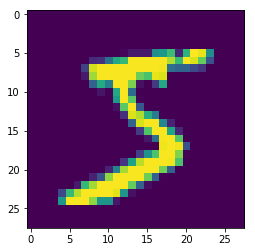

In [5]:
# Print the shape (dimentions) of X_train i.e 60000 images of 28x28
print (X_train.shape)

# Importing pyplot from matplotlib and naming it as plt
from matplotlib import pyplot as plt

# When working with Anaconda Notebook, this line diplays images inline
%matplotlib inline

# Display the first image of training set
plt.imshow(X_train[0])

In [0]:
# Reshaping the array of (60000,28,28,1) to an array of (60000,28,28,1). X_train.shape[0] is number of images = 60000. This line has no impact on program.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)

# Reshaping the array of (10000,28,28,1) to an array of (10000,28,28,1). X_test.shape[0] is number of images = 10000. This line has no impact on program.
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Set X_train data type to float32
X_train = X_train.astype('float32')

# Set X_test data type to float32
X_test = X_test.astype('float32')

# Normalize the X_train values between 0 and 1
X_train /= 255

# Normalize the X_test values between 0 and 1
X_test /= 255

In [21]:
# Print labels of first 10 images(y_train[0] to y_train[9]) of training set
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

# Converting training set labels to one hot representation
Y_train = np_utils.to_categorical(y_train, 10)

# Converting test set labels to one hot representation
Y_test = np_utils.to_categorical(y_test, 10)

In [25]:
# Printing one hot labels of first 10 images in training set
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
# Importing Activation and MaxPooling2D from keras.layers
from keras.layers import Activation, MaxPooling2D, Dense

# Create a Sequential Model
model = Sequential() 

# Shape of input images is 28x28 with 1 channel
# Add 2D Convolution layer of 32 kernels of 3x3 with relu activation
# Output is 32 feature maps of 26x26
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Add 2D Convolution layer of 64 kernels of 3x3 with relu activation
# Output is 64 feature maps of 24x24
model.add(Convolution2D(64, 3, 3, activation='relu'))

# Add 2D Convolution layer of 128 kernels of 3x3 with relu activation
# Output is 128 feature maps of 22x22
model.add(Convolution2D(128, 3, 3, activation='relu'))

# Add max pooling layer of 2x2
# Output is 128 feature maps of 11x11
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add 2D Convolution layer of 256 kernels of 3x3 with relu activation
# Output is 256 feature maps of 9x9
model.add(Convolution2D(256, 3, 3, activation='relu'))

# Add 2D Convolution layer of 512 kernels of 3x3 with relu activation
# Output is 512 feature maps of 7x7
model.add(Convolution2D(512, 3, 3, activation='relu'))

# Add 2D Convolution layer of 1024 kernels of 3x3 with relu activation
# Output is 1024 feature maps of 5x5
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# Add 2D Convolution layer of 2048 kernels of 3x3 with relu activation
# Output is 2048 feature maps of 3x3
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# Add 2D Convolution layer of 10 kernels of 3x3 with relu activation
# Output is 10 feature maps of 1x1
model.add(Convolution2D(10, 3, 3, activation='relu'))

# Flatten the model to single array of 10 elements
model.add(Flatten())

# Convert each prediction to probability like one hot representation using softmax
# model.add(Activation('softmax'))
# Due to missing Dense layer classifier, this model will never train.
# model.add(Activation('softmax'))

# Code cane be fixed by adding Dense layer
model.add(Dense(10, activation='softmax'))

# Show summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call 

In [0]:
# Compile the model with adam optimizer, categorical_crossentropy loss function and accuracy metrics
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
# Fit the model to training data/labels in batches of 32 for 10 epochs

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.6297 - acc: 0.8332
Epoch 2/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0906 - acc: 0.9798
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0604 - acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0432 - acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0390 - acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0305 - acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0316 - acc: 0.9923
Epoch 8/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0250 - acc: 0.9933
Epoch 9/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0231 - acc: 0.9940
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0233 - a

In [0]:
# Evaluate the model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [45]:
# Print the score
print(score)

[0.02995502646468667, 0.993]


In [0]:
# Predict the labels of test data
y_pred = model.predict(X_test)

In [47]:
# Print the predicted labels for first 10 test elements
print(y_pred[:9])

# Print the actual labeles for first 10 test elements
print(y_test[:9])

[[9.55589167e-12 1.35421286e-12 8.48045072e-12 1.05276586e-10
  3.22511995e-09 3.17787382e-14 3.59017720e-16 1.00000000e+00
  1.78918038e-13 6.75900613e-10]
 [6.34870767e-11 4.73616250e-11 9.99999762e-01 1.85399845e-13
  1.08397835e-09 5.01788413e-26 6.29639316e-15 1.13353361e-10
  6.47221729e-12 1.91238058e-07]
 [2.29745219e-14 9.99986410e-01 4.86753561e-06 2.33697110e-15
  1.51928759e-07 8.55199880e-16 8.77770784e-13 8.27821987e-06
  2.17580165e-07 8.60363517e-12]
 [9.99999881e-01 1.29862023e-16 4.13448026e-10 6.38892601e-08
  1.13892558e-14 1.07714501e-15 4.85175511e-10 3.57243396e-14
  3.22032037e-08 1.86996356e-08]
 [1.02613169e-17 1.09990559e-08 2.12974495e-12 7.50167120e-18
  9.99845743e-01 6.36264872e-08 9.72088010e-09 6.25818286e-10
  2.89725613e-05 1.25085760e-04]
 [1.93173441e-17 9.99998808e-01 6.20453363e-07 8.65792494e-18
  1.81327948e-08 5.65052122e-18 3.74920330e-15 5.62686978e-07
  5.57752244e-08 1.78123765e-13]
 [1.04441544e-28 1.17600221e-10 2.07003438e-22 6.58423147e

In [0]:
# As I mentioned in above cell building sequential model, Dense layer at the end is missing and model is unable to train. After correcting it model trained very well.